# Module 12 Text Analytics

**Topics**:
- Text analytics
- Get the frequency of the words in the data.
- Save a dataframe to a file.
- Using matplotlib to generate a visual of the words.
- Using WordCloud to generate a word cloud of the words.
- Create a WordCloud with a Mask
- Parts of speach tags (POS) are covered

In [1]:
# Load the text file 
f = open("cs621_text_data_1.txt")

In [2]:
# Store eeach line  of the file in a list

data_raw = []

f.seek(0)

for line in f:
    
    line = line.strip()
    line = line.replace(".", "")
    line = line.replace(",","")
    
    data_raw.append(line)
                        
# close the file
f.close()

print(data_raw)

['Data science is a great subject to study', 'Software programming is fun', 'I love both data and computer programming', 'CS617 is programming for data science']


In [3]:
# Process the words to be stored in a list -- data[]
data = []

for i in range(len(data_raw)):
    
    words = data_raw[i].split()
    
    for word in words:
        word = word.lower()
        data.append(word)
        
print(data)

['data', 'science', 'is', 'a', 'great', 'subject', 'to', 'study', 'software', 'programming', 'is', 'fun', 'i', 'love', 'both', 'data', 'and', 'computer', 'programming', 'cs617', 'is', 'programming', 'for', 'data', 'science']


In [4]:
# Store only distinct words
data_distinct = list(set(data))

print(data_distinct)

['a', 'to', 'data', 'study', 'fun', 'love', 'both', 'and', 'cs617', 'great', 'software', 'science', 'computer', 'subject', 'is', 'programming', 'for', 'i']


In [5]:
# Create word frequency dictionary.

word_freq = {}

for word in data_distinct:
    word_freq[word] = 0

In [6]:
# Compute each word's frequency via two for loops.

for index in range(len(data_distinct)):
    
    key_word = data_distinct[index]
    count = 0
    
    for word in data:
        
        if word == key_word:
            count += 1
            
    word_freq[key_word] = count
    
print(word_freq)

{'a': 1, 'to': 1, 'data': 3, 'study': 1, 'fun': 1, 'love': 1, 'both': 1, 'and': 1, 'cs617': 1, 'great': 1, 'software': 1, 'science': 2, 'computer': 1, 'subject': 1, 'is': 3, 'programming': 3, 'for': 1, 'i': 1}


### Storing in a Pandas Series object to view in order

In [7]:
import pandas as pd

In [8]:
word_freq_series = pd.Series(word_freq)
word_freq_series.sort_index(inplace=True)

print(word_freq_series)

a              1
and            1
both           1
computer       1
cs617          1
data           3
for            1
fun            1
great          1
i              1
is             3
love           1
programming    3
science        2
software       1
study          1
subject        1
to             1
dtype: int64


In [9]:
type(word_freq_series)

pandas.core.series.Series

In [10]:
# Sort the Series by the frequency values
word_freq_series.sort_values(ascending=False, inplace=True)

print(word_freq_series)

is             3
data           3
programming    3
science        2
a              1
subject        1
study          1
software       1
love           1
i              1
and            1
great          1
fun            1
for            1
cs617          1
computer       1
both           1
to             1
dtype: int64


In [11]:
# Create a dataframe from the Series
df = word_freq_series.sort_values(ascending=False).to_frame(name='freq').reset_index()

df

,index,freq
0,is,3
1,programming,3
2,data,3
3,science,2
4,great,1
5,both,1
6,computer,1
7,cs617,1
8,for,1
9,fun,1


In [12]:
### Save the dataframe to a file
#df.to_csv("word_freq.csv", index=False)

In [13]:
# Show contents of data again
data

['data',
 'science',
 'is',
 'a',
 'great',
 'subject',
 'to',
 'study',
 'software',
 'programming',
 'is',
 'fun',
 'i',
 'love',
 'both',
 'data',
 'and',
 'computer',
 'programming',
 'cs617',
 'is',
 'programming',
 'for',
 'data',
 'science']

In [14]:
# Create a Series from the words in the data[] list.

word_freq_series_2 = pd.Series(data)

word_freq_series_2

0            data
1         science
2              is
3               a
4           great
5         subject
6              to
7           study
8        software
9     programming
10             is
11            fun
12              i
13           love
14           both
15           data
16            and
17       computer
18    programming
19          cs617
20             is
21    programming
22            for
23           data
24        science
dtype: object

In [15]:
# Creating a frequency count of the data in word_freq_series_2.
word_freq_series_2.value_counts()

data           3
is             3
programming    3
science        2
a              1
great          1
subject        1
to             1
study          1
software       1
fun            1
i              1
love           1
both           1
and            1
computer       1
cs617          1
for            1
Name: count, dtype: int64

In [16]:
# Using a dataframe to store the words.
df2 = pd.DataFrame(data)

df2

,0
0,data
1,science
2,is
3,a
4,great
5,subject
6,to
7,study
8,software
9,programming


In [17]:
# name the column
df2.columns = ['word']

df2

,word
0,data
1,science
2,is
3,a
4,great
5,subject
6,to
7,study
8,software
9,programming


In [18]:
# Count the frequecy of the words using dataframe column.
df2['word'].value_counts()

word
data           3
is             3
programming    3
science        2
a              1
great          1
subject        1
to             1
study          1
software       1
fun            1
i              1
love           1
both           1
and            1
computer       1
cs617          1
for            1
Name: count, dtype: int64

In [19]:
type(df2['word'].value_counts())

pandas.core.series.Series

In [20]:
# Create a dataframe using the counts.
df_3 = pd.DataFrame(df2['word'].value_counts()).reset_index()

df_3

,word,count
0,data,3
1,is,3
2,programming,3
3,science,2
4,a,1
5,great,1
6,subject,1
7,to,1
8,study,1
9,software,1


In [21]:
# Change the column names
df_3.columns=['word','freq']

df_3

,word,freq
0,data,3
1,is,3
2,programming,3
3,science,2
4,a,1
5,great,1
6,subject,1
7,to,1
8,study,1
9,software,1


In [22]:
# Create two lists 
words_to_plot = ['data','science','text','analytics','software']
importances = [280, 240, 200, 160, 120]

In [23]:
import matplotlib.pyplot as plt

In [24]:
word = 'Science'

Text(0.5, 0.5, 'Science')

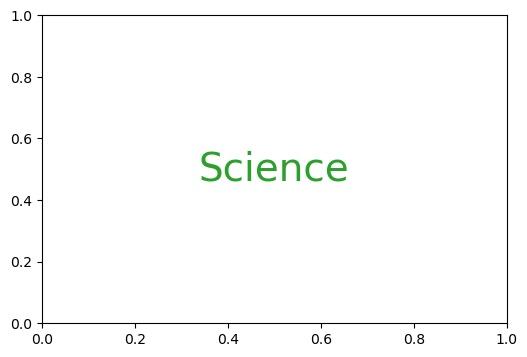

In [25]:
# Create a plot with matplotlib
plt.subplots(figsize=(6, 4))

text_kwargs = dict(ha='center', va='center', fontsize=28, color='C2')

plt.text(0.5, 0.5, word, **text_kwargs)

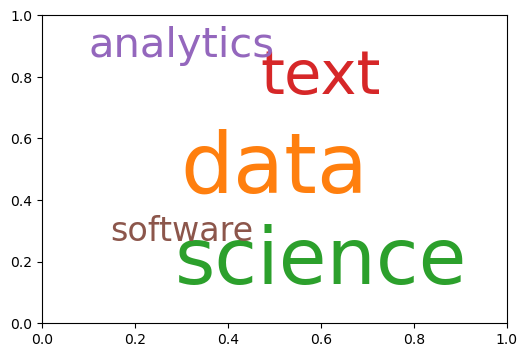

In [26]:
#Let's plot the given word list.

words_to_plot = ['data', 'science', 'text', 'analytics', 'software']
importances = [60, 56 , 44, 30, 24]
plt.subplots(figsize=(6, 4))

text_kwargs = dict(ha='center', va='center', fontsize= importances[0], color='C1')
#plt.text(3, 2, words_to_plot[0],ha='center', va='center', fontsize=28, color='C1')
plt.text(0.5, 0.5, words_to_plot[0],**text_kwargs)

text_kwargs = dict(ha='center', va='center', fontsize=importances[1], color='C2')
plt.text(0.6, 0.2, words_to_plot[1],**text_kwargs)

text_kwargs = dict(ha='center', va='center', fontsize=importances[2], color='C3')
plt.text(0.6, 0.8, words_to_plot[2],**text_kwargs)

text_kwargs = dict(ha='center', va='center', fontsize=importances[3], color='C4')
plt.text(0.3, 0.9, words_to_plot[3],**text_kwargs)

text_kwargs = dict(ha='center', va='center', fontsize=importances[4], color='C5')
plt.text(0.3, 0.3, words_to_plot[4],**text_kwargs)

plt.show()

## Using a WordCloud Visualization

**Notes**:
- WordCloud can perfrom the following:

  - Can perform text processing.
  - Stopwords will be removed.
  - Punctuation marks will be removed.
  - Words will be normalized

In [27]:
from wordcloud import WordCloud

In [28]:
text = open('constitution.txt').read()

In [29]:
# Create the WordCloud from the 'constitution.txt' file.

wordcloud = WordCloud(width=600, height=400).generate(text)

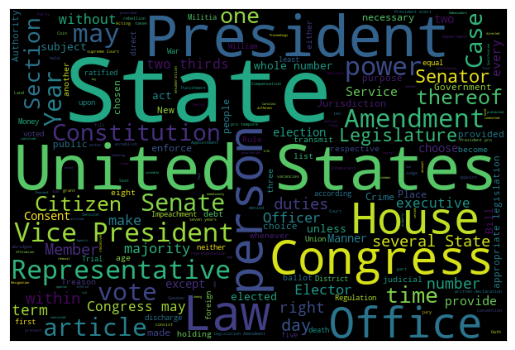

In [30]:
# Show the cloud as an image
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

plt.imshow(wordcloud)

### Change the background color

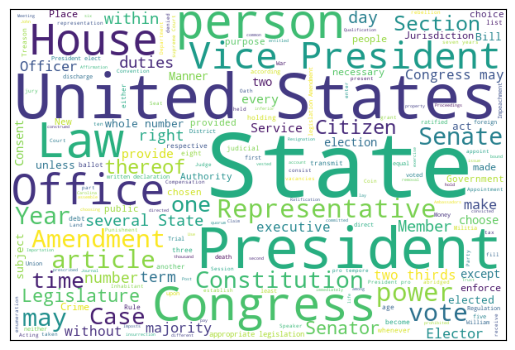

In [31]:
wordcloud2 = WordCloud(width=600, height=400, background_color='white').generate(text)

# Show the cloud as an image
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

plt.imshow(wordcloud2)

In [32]:
# Show the word frequency
print(word_freq)

{'a': 1, 'to': 1, 'data': 3, 'study': 1, 'fun': 1, 'love': 1, 'both': 1, 'and': 1, 'cs617': 1, 'great': 1, 'software': 1, 'science': 2, 'computer': 1, 'subject': 1, 'is': 3, 'programming': 3, 'for': 1, 'i': 1}


In [33]:
# Create  different dictionary of various values
my_freq = {}

for index in range(len(words_to_plot)):
    
    my_freq[words_to_plot[index]] = importances[index]

my_freq

{'data': 60, 'science': 56, 'text': 44, 'analytics': 30, 'software': 24}

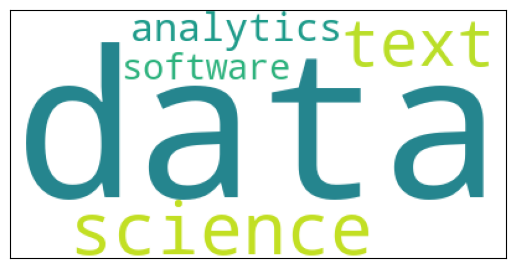

In [34]:
# Create a WordCloud from the frequencies

wordcloud4 = WordCloud(max_font_size=200, stopwords=None, max_words=20
                       , background_color='White').generate_from_frequencies(my_freq)


# Show the cloud as an image
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

plt.imshow(wordcloud4)

## Create a WordCloud with a Mask

In [35]:
import numpy as np
from PIL import Image

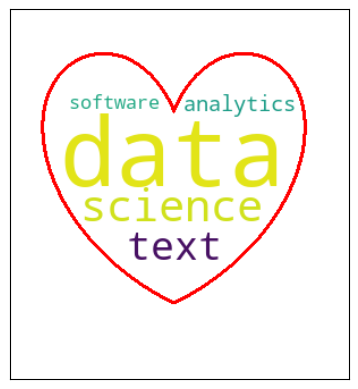

In [36]:
# Create a word cloud with a mask. 
mask = np.array(Image.open("heart.png"))

wordcloud4= WordCloud(width = 300, height = 200, mask=mask,contour_color='red',contour_width=3 , max_font_size=200
                      , stopwords = None, max_words=20, background_color="white").generate_from_frequencies(my_freq)

plt.figure()
plt.imshow(wordcloud4, interpolation = "bilinear")
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)


plt.show()

## Parts of Speech Tagging

In [37]:
from nltk import pos_tag, word_tokenize

In [38]:
f = open("cs621_text_data_1.txt")

# Load the data into a list
data_raw =[]

f.seek(0)

for line in f:
    data_raw.append(line)

f.close()

In [39]:
# Show contents of the list
data_raw

['Data science is a great subject to study.\n',
 'Software programming is fun.\n',
 'I love both data and computer programming. \n',
 'CS617 is programming for data science.']

#### Find the Parts of Speech

In [40]:
pos_tags = []

for sen in data_raw:
    
    sen = sen.strip()
    pos = pos_tag(word_tokenize(sen))
    pos_tags.append(pos)
    
# Show the tuple of the parts of speech
pos_tags

[[('Data', 'NNP'),
  ('science', 'NN'),
  ('is', 'VBZ'),
  ('a', 'DT'),
  ('great', 'JJ'),
  ('subject', 'NN'),
  ('to', 'TO'),
  ('study', 'NN'),
  ('.', '.')],
 [('Software', 'NNP'),
  ('programming', 'NN'),
  ('is', 'VBZ'),
  ('fun', 'NN'),
  ('.', '.')],
 [('I', 'PRP'),
  ('love', 'VBP'),
  ('both', 'DT'),
  ('data', 'NNS'),
  ('and', 'CC'),
  ('computer', 'NN'),
  ('programming', 'NN'),
  ('.', '.')],
 [('CS617', 'NNP'),
  ('is', 'VBZ'),
  ('programming', 'VBG'),
  ('for', 'IN'),
  ('data', 'NNS'),
  ('science', 'NN'),
  ('.', '.')]]

In [41]:
# Store the POS tags so we can get a count / frequncy of the tags
all_tags = []

for tag in pos_tags:
    
    for tg in tag:
        print(tg[1])
        all_tags.append(tg[1])

NNP
NN
VBZ
DT
JJ
NN
TO
NN
.
NNP
NN
VBZ
NN
.
PRP
VBP
DT
NNS
CC
NN
NN
.
NNP
VBZ
VBG
IN
NNS
NN
.


In [42]:
len(all_tags)

29

In [43]:
# Create a Set of distinct tags
distinct_tags = set(all_tags)

distinct_tags

{'.',
 'CC',
 'DT',
 'IN',
 'JJ',
 'NN',
 'NNP',
 'NNS',
 'PRP',
 'TO',
 'VBG',
 'VBP',
 'VBZ'}

In [44]:
# remove the . tag from the list
distinct_tags_list = []

for tag in distinct_tags:
    
    if tag.isalpha() == True:
        distinct_tags_list.append(tag)

# Show the list of distinct tags
distinct_tags_list

['JJ', 'CC', 'NNP', 'PRP', 'TO', 'VBP', 'NN', 'DT', 'IN', 'VBG', 'VBZ', 'NNS']

In [45]:
# Create tag frequency dictionary
tag_freq = {}

for tag in distinct_tags_list:
    tag_freq[tag] = 0

In [46]:
# Compute the frequency of the tags

for tag_u in distinct_tags_list:
    
    for tag in all_tags:
        if tag == tag_u:
            tag_freq[tag_u] = tag_freq[tag_u] + 1

# Show the frequencies
tag_freq

{'JJ': 1,
 'CC': 1,
 'NNP': 3,
 'PRP': 1,
 'TO': 1,
 'VBP': 1,
 'NN': 8,
 'DT': 2,
 'IN': 1,
 'VBG': 1,
 'VBZ': 3,
 'NNS': 2}

In [47]:
# Create a Series out of the POS tag frequency dictionary
ser_tag = pd.Series(tag_freq)

In [48]:
ser_tag.sort_values(ascending=False, inplace=True)

ser_tag

NN     8
NNP    3
VBZ    3
DT     2
NNS    2
JJ     1
CC     1
PRP    1
TO     1
VBP    1
IN     1
VBG    1
dtype: int64

In [49]:
# Use only the first 6 POS tags from the Series.
top_6_freq = ser_tag[:6]

print(top_6_freq)

NN     8
NNP    3
VBZ    3
DT     2
NNS    2
JJ     1
dtype: int64


<Axes: >

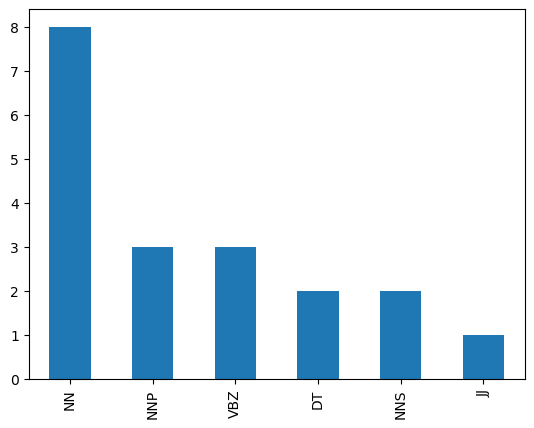

In [50]:
# Create a Bar chart of the frequencies  of  the top 6 POS tags
top_6_freq.plot.bar()